In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

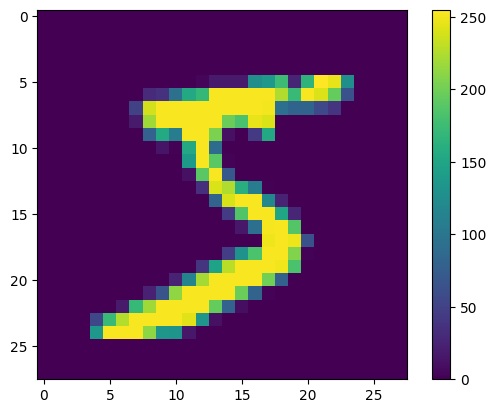

In [3]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

3


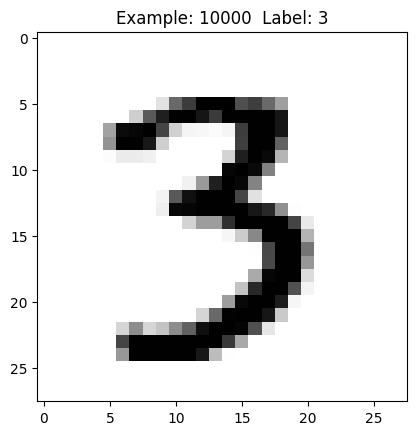

In [6]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_digit(10000)

In [7]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros',
                bias_initializer='zeros')
  ])

In [8]:
model = create_model()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=x_train, 
          y=y_train, 
          epochs=3, 
          validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7657 - accuracy: 0.8387 - val_loss: 0.4765 - val_accuracy: 0.8845
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4529 - accuracy: 0.8828 - val_loss: 0.3975 - val_accuracy: 0.8964
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4010 - accuracy: 0.8925 - val_loss: 0.3660 - val_accuracy: 0.9031


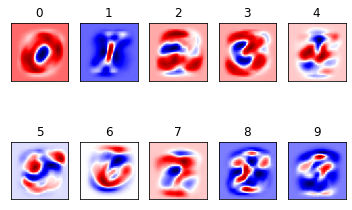

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = model.layers[1].get_weights()[0][:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

plt.show()